In [1]:
import mglearn

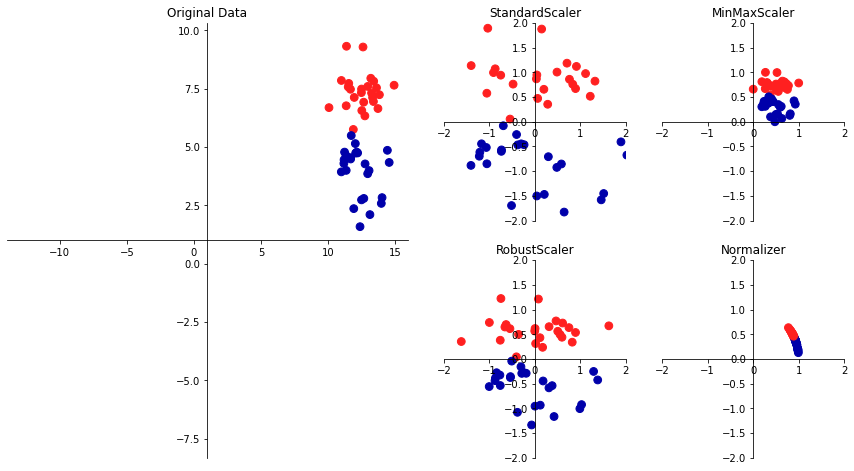

In [2]:
mglearn.plots.plot_scaling()

In [3]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("[cancer.keys()]  \n{}".format(cancer.keys()))
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

[cancer.keys()]  
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태 : (569, 30)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=77)

In [6]:
import numpy as np
# np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)

print("변환전 후 크기 : {}".format(X_train.shape))
print("변환전 최대, 최소 : \n {}, {}".format(X_train.max(axis=0), 
                                      X_train.min(axis=0)))
print()
print("변환된 후 크기 : {}".format(X_train_s.shape))
print("변환후 최대, 최소 : \n {}, {}".format(X_train_s.max(axis=0), 
                                      X_train_s.min(axis=0)))

변환전 후 크기 : (426, 30)
변환전 최대, 최소 : 
 [28.110 39.280 188.500 2499.000 0.145 0.345 0.427 0.201 0.304 0.096 2.873
 4.885 21.980 525.600 0.031 0.106 0.396 0.053 0.079 0.030 33.120 47.160
 220.800 3432.000 0.223 1.058 1.252 0.291 0.577 0.207], [7.691 10.380 47.920 170.400 0.053 0.019 0.000 0.000 0.106 0.050 0.117
 0.360 0.771 7.254 0.002 0.002 0.000 0.000 0.008 0.001 8.678 12.490 54.490
 223.600 0.071 0.027 0.000 0.000 0.157 0.055]

변환된 후 크기 : (426, 30)
변환후 최대, 최소 : 
 [1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000], [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000]


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\jypark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jypark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

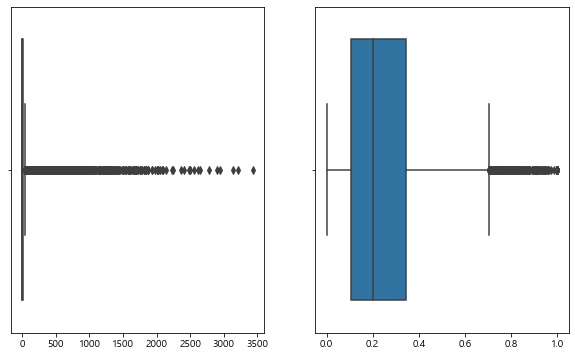

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.subplot(1,2,2)
sns.boxplot(X_train_s)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 같은 내용 다른 방법
X_train_scaler = scaler.fit(X_train).transform(X_train)
X_train_scaler_d = scaler.fit_transform(X_train)

### fit().transform()과 fit_transform()과 같다.
print("변경전 :", X_train.max(), X_train.min() )
print("변경후 :", X_train_scaler.max(), X_train_scaler.min() )
print("변경후 :", X_train_scaler_d.max(), X_train_scaler_d.min() )

변경전 : 3432.0 0.0
변경후 : 11.587694680416146 -3.0966340529458245
변경후 : 11.587694680416146 -3.0966340529458245


C:\Users\jypark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jypark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jypark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

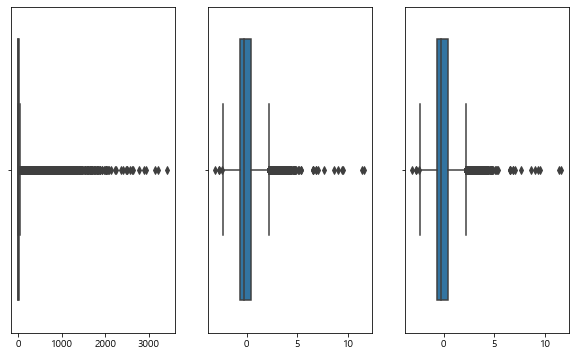

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10,6))
sns.boxplot(X_train, ax=axes[0])
sns.boxplot(X_train_scaler, ax=axes[1])
sns.boxplot(X_train_scaler_d, ax=axes[2])

In [18]:
from sklearn.datasets import make_blobs

# 인위적인 데이터셋 생성

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

print(X.shape)

# 학습용 테스트용 세트로 나누기
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

(50, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

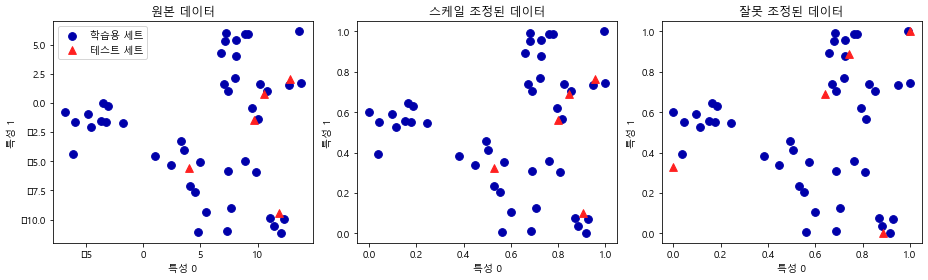

In [19]:
# 학습용 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="학습용 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="학습용 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

### K-means - 군집 알고리즘

In [20]:
### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

### 마이너스 설정
from matplotlib import rc
matplotlib.rc("axes", unicode_minus=False)

In [21]:
import mglearn 
%matplotlib inline

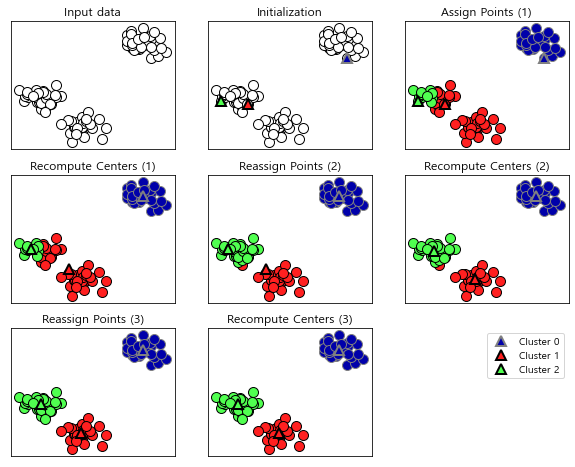

In [22]:
mglearn.plots.plot_kmeans_algorithm()

In [23]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

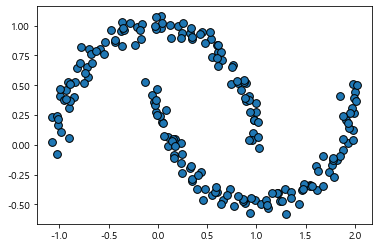

In [26]:
import matplotlib.pyplot as plt

feature1 = X[ : , 0]
feature2 = X[ : , 1]

plt.scatter(feature1, feature2,
            cmap=mglearn.cm2, 
            s=60,
            edgecolors='k')

In [28]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_pred = kmeans.predict(X)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0])

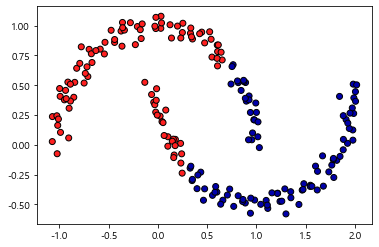

In [29]:
feature1 = X[ : , 0]
feature2 = X[ : , 1]

plt.scatter(feature1, feature2,
            cmap=mglearn.cm2, 
            c= y_pred,
            edgecolors='k')

In [31]:
kmeans.cluster_centers_

array([[1.207, -0.083],
       [-0.200, 0.580]])

Text(0, 0.5, 'Feature 1')

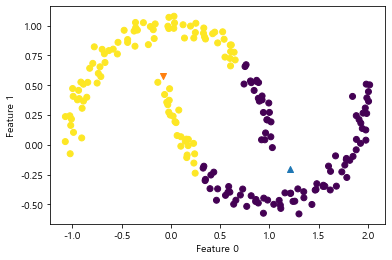

In [33]:
centerX = kmeans.cluster_centers_[: , 0]
centerY = kmeans.cluster_centers_[:, 1]

plt.scatter(feature1, feature2,
            c= y_pred)

plt.scatter(centerX[0], centerX[1], marker="^")
plt.scatter(centerY[0], centerY[1], marker="v")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, '특성 1')

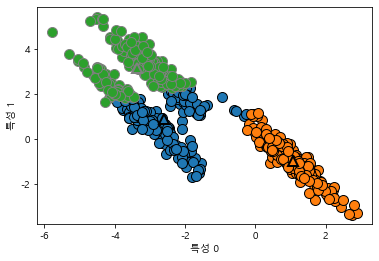

In [34]:
# 무작위로 데이터 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:,0],
                         X[:,1],
                         kmeans.labels_,
                         markers='o')

mglearn.discrete_scatter(
   kmeans.cluster_centers_[:,0],
   kmeans.cluster_centers_[:,1], 
   [0,1,2],
   markers="^",
   markeredgewidth=2)

plt.xlabel('특성 0')
plt.ylabel('특성 1')

In [35]:
import mglearn
import matplotlib.pyplot as plt

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

### 마이너스 설정
from matplotlib import rc
matplotlib.rc("axes", unicode_minus=False)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


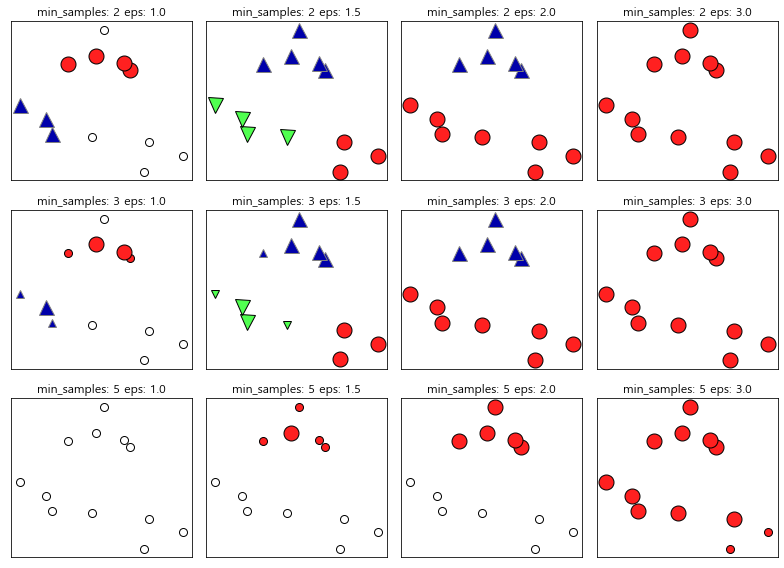

In [36]:
mglearn.plots.plot_dbscan()

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [39]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
clusters

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [45]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)
kmeans_clusters

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

Text(0, 0.5, '특성 1')

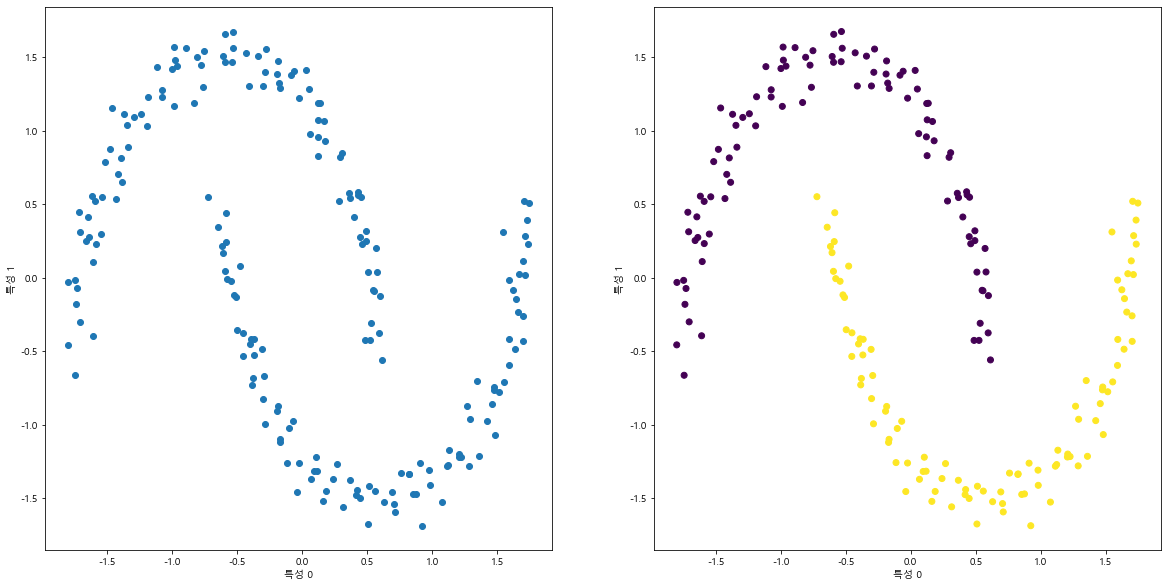

In [40]:
# 원래 데이터 그래프
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)   # 2행 1열에 첫번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2)  # 원본 샘플 데이터 
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# DBSCAN 적용한 그래프
plt.subplot(1,2,2)   # 2행 1열에 두번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c=clusters) # DBSCAN 적용한 샘플 데이터
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

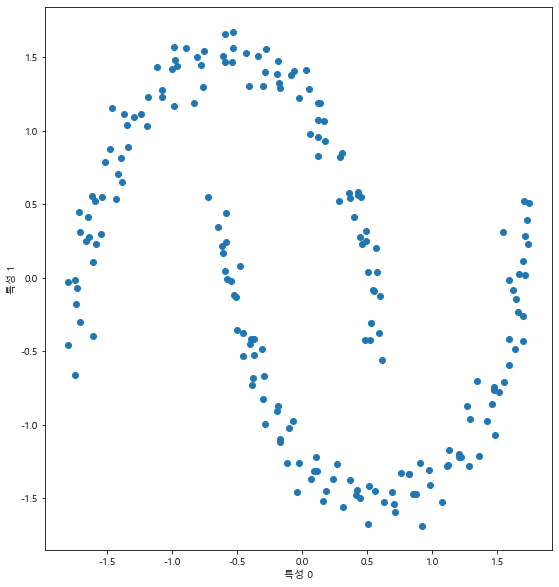

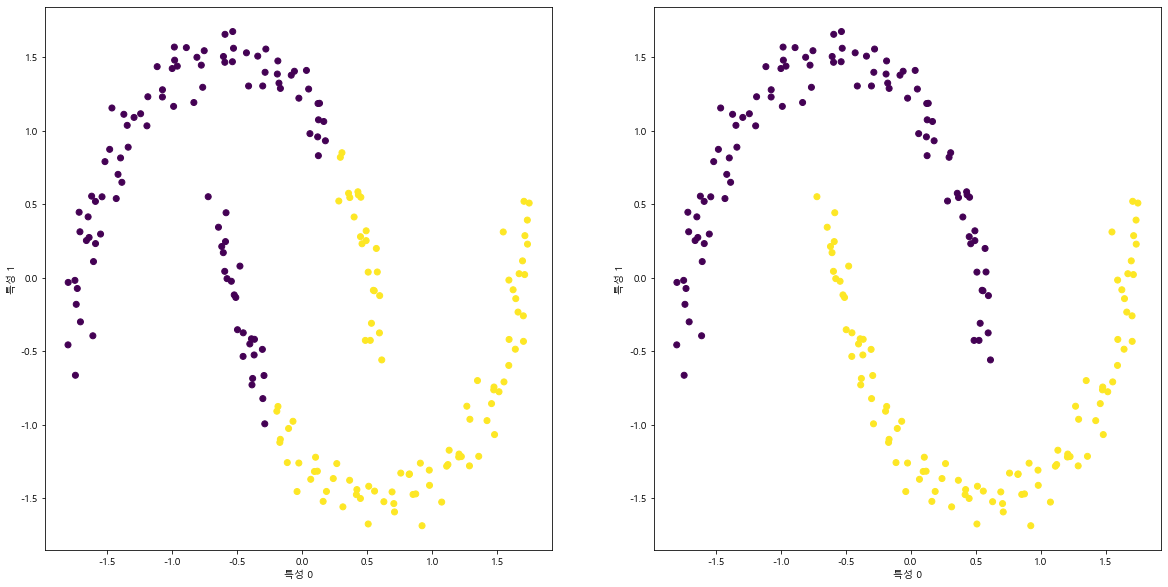

In [46]:
# 원래 데이터 그래프
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)   # 2행 1열에 첫번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2)  # 원본 샘플 데이터 
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# Kmeans 데이터 그래프
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)   # 2행 1열에 첫번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c=kmeans_clusters) # DBSCAN 적용한 샘플 데이터
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# DBSCAN 적용한 그래프
plt.subplot(1,2,2)   # 2행 1열에 두번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c=clusters) # DBSCAN 적용한 샘플 데이터
plt.xlabel("특성 0")
plt.ylabel("특성 1")